In [86]:
# Importação de Bibliotecas 
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [87]:
dataset = pd.read_csv('../visualizacao_de_dados_financeiros/acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1941,2022-10-24,9.37,6.87,34.919998,4.080000,31.100000,112.139999
1942,2022-10-25,8.84,6.69,35.049999,4.290000,30.059999,110.480003
1943,2022-10-26,8.19,6.18,37.980000,3.910000,29.420000,108.779999
1944,2022-10-27,8.62,6.38,38.830002,4.220000,30.760000,110.000000


In [89]:
# normalizando os dados
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [90]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1941,2022-10-24,0.625083,0.451974,5.895585,17.524869,2.611097,2.372831
1942,2022-10-25,0.589727,0.440132,5.917533,18.426885,2.523781,2.337706
1943,2022-10-26,0.546364,0.406579,6.412209,16.794667,2.470048,2.301735
1944,2022-10-27,0.575050,0.419737,6.555715,18.126212,2.582551,2.327550


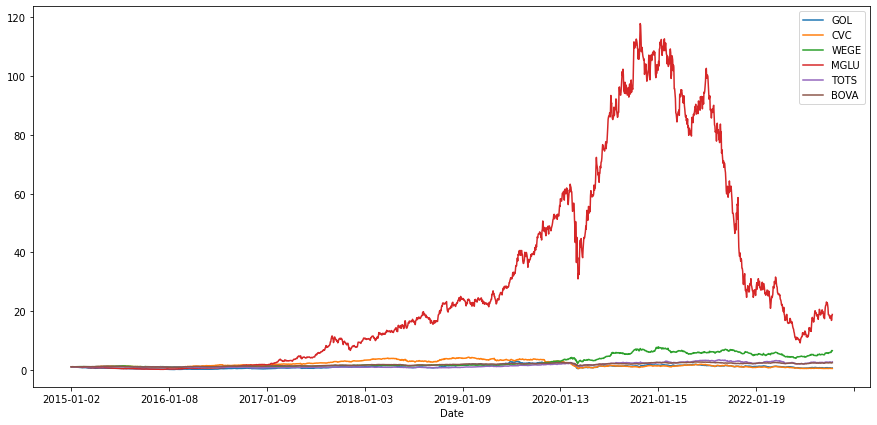

In [91]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [92]:
# excluindo a coluna Date
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [93]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477


In [94]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

GOL     0.217602
CVC     0.061689
WEGE    0.297712
MGLU    0.585790
TOTS    0.198238
BOVA    0.143650
dtype: float64

In [95]:
retorno_anual = retorno_anual * 100
retorno_anual

GOL     21.760159
CVC      6.168877
WEGE    29.771153
MGLU    58.579026
TOTS    19.823821
BOVA    14.364974
dtype: float64

In [96]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [97]:
pesos_carteira1.sum()

1.0

In [98]:
np.dot(retorno_anual, pesos_carteira1)

27.220607121643834

In [99]:
pesos_carteiras2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])

In [100]:
pesos_carteiras2.sum()

1.0

In [101]:
np.dot(retorno_anual, pesos_carteiras2)

34.77801430717577

### Comparativo: carteira x ibovespa

In [102]:
dataset = pd.read_csv('../visualizacao_de_dados_financeiros/acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1941,2022-10-24,9.37,6.87,34.919998,4.080000,31.100000,112.139999
1942,2022-10-25,8.84,6.69,35.049999,4.290000,30.059999,110.480003
1943,2022-10-26,8.19,6.18,37.980000,3.910000,29.420000,108.779999
1944,2022-10-27,8.62,6.38,38.830002,4.220000,30.760000,110.000000


In [103]:
# normalizando os dados
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [104]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1941,2022-10-24,0.625083,0.451974,5.895585,17.524869,2.611097,2.372831
1942,2022-10-25,0.589727,0.440132,5.917533,18.426885,2.523781,2.337706
1943,2022-10-26,0.546364,0.406579,6.412209,16.794667,2.470048,2.301735
1944,2022-10-27,0.575050,0.419737,6.555715,18.126212,2.582551,2.327550


In [105]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + dataset_normalizado['TOTS']) / 5
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,0.971492
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...,...
1941,2022-10-24,0.625083,0.451974,5.895585,17.524869,2.611097,2.372831,5.421722
1942,2022-10-25,0.589727,0.440132,5.917533,18.426885,2.523781,2.337706,5.579611
1943,2022-10-26,0.546364,0.406579,6.412209,16.794667,2.470048,2.301735,5.325973
1944,2022-10-27,0.575050,0.419737,6.555715,18.126212,2.582551,2.327550,5.651853


In [107]:
figura = px.line(title='Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show();

In [110]:
dataset_normalizado.drop(['GOL', 'WEGE', 'CVC', 'MGLU', 'TOTS'], axis = 1, inplace=True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.994477
2,2015-01-06,0.985612,0.978854
3,2015-01-07,1.018832,0.971492
4,2015-01-08,1.026449,0.966805
...,...,...,...
1941,2022-10-24,2.372831,5.421722
1942,2022-10-25,2.337706,5.579611
1943,2022-10-26,2.301735,5.325973
1944,2022-10-27,2.327550,5.651853


In [111]:
figura = px.line(title='Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show();